https://www.youtube.com/watch?v=TNZk8lo4e-Q&t=2733s

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm

In [45]:
# Likelihood
def l(theta):
    return 4+ np.sin(theta) - (theta**2)/3

In [46]:
x = np.linspace(-3, 3, 1000)

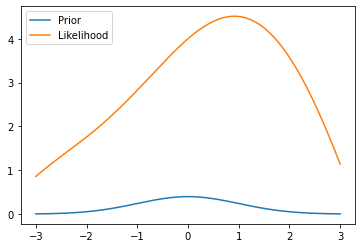

In [47]:
prior = norm(0).pdf

plt.plot(x, prior(x),label='Prior')
plt.plot(x, l(x),label='Likelihood')
plt.legend()

In [51]:
p(100)

0.3989422804014327

In [75]:
q_rvs = norm(loc=0, scale=10)
q = q_rvs.pdf

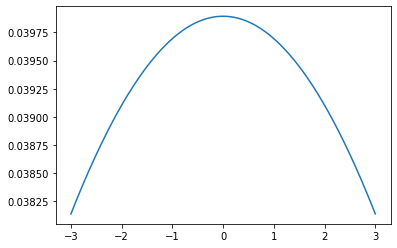

In [84]:
plt.plot(x, q(x))

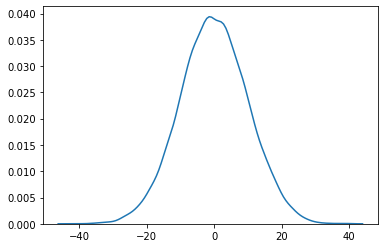

In [86]:
sns.kdeplot(q_rvs.rvs(size=20000))

In [110]:
q_samples = q_rvs.rvs(size=10000)

In [111]:
prior_eval_q = prior(q_samples)

In [112]:
likelihood_eval_q = l(q_samples)

In [113]:
z = (prior_eval_q*likelihood_eval_q/q_samples).mean()

In [114]:
z

0.033548477492293956

Importance sampling for linear regression simplified setting

$y \sim \mathcal{N}(\theta x, \sigma^2)$ 

In [70]:
theta_gt = 4
sigma_gt = 1


# generate some samples

x = np.random.uniform(0, 1, size = 100)
y = np.random.normal(theta_gt*x, sigma_gt)


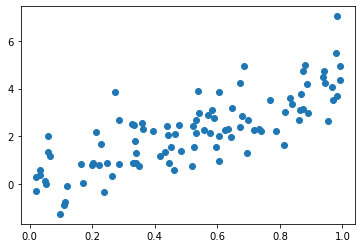

In [71]:
plt.scatter(x, y)

In [151]:
# Proposal

q_rvs = norm(loc=3, scale=10)
q = q_rvs.pdf

In [152]:
q

<bound method rv_frozen.pdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca8b9e3d30>>

In [153]:
prior = norm(0).pdf



In [154]:
prior

<bound method rv_frozen.pdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca8b5b0430>>

In [155]:
# Likelihood
import scipy.stats
def l(theta):
    
    return np.prod(scipy.stats.norm(theta*x, 3).pdf(y))

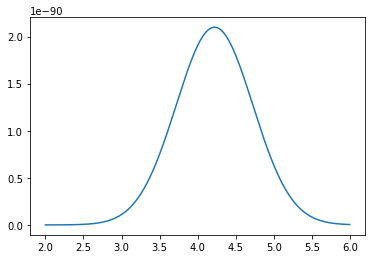

In [156]:
xu = np.linspace(2, 6, 1000)
k = []
for xt in xu:
    k.append(l(xt))
plt.plot(xu, k)

(array([60.,  7.,  3.,  3.,  1.,  3.,  1.,  2.,  2.,  1.,  2.,  1.,  0.,
         0.,  3.,  1.,  1.,  3.,  1.,  5.]),
 array([1.84014767e-11, 1.99336615e-02, 3.98673230e-02, 5.98009844e-02,
        7.97346459e-02, 9.96683074e-02, 1.19601969e-01, 1.39535630e-01,
        1.59469292e-01, 1.79402953e-01, 1.99336615e-01, 2.19270276e-01,
        2.39203938e-01, 2.59137599e-01, 2.79071261e-01, 2.99004922e-01,
        3.18938584e-01, 3.38872245e-01, 3.58805906e-01, 3.78739568e-01,
        3.98673229e-01]),
 <a list of 20 Patch objects>)

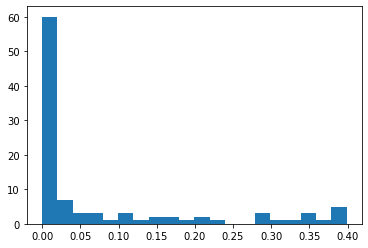

In [157]:

plt.hist(scipy.stats.norm(10*x, 1).pdf(y), density=False, bins=20)

In [158]:
n_samples = 1000
q_samples = q_rvs.rvs(size=n_samples)
#weights = np.multiply(p_likelihood,  p_prior) / p_proposal


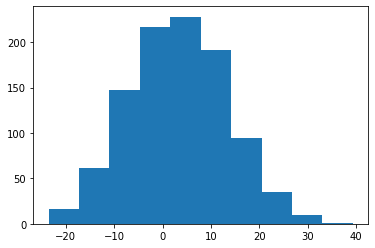

In [159]:
plt.hist(q_samples)

w = np.zeros(n_samples)
for i in range(n_samples):
    theta_i = q_samples[i]
    likelihood_i = l(theta_i)
    prior_i = prior(theta_i)
    q_i = q_rvs.pdf(theta_i)
    w_i = likelihood_i*prior_i/q_i
    w[i] = w_i

In [160]:
np.mean(w)

5.699345603019623e-94

In [164]:
post = np.zeros(n_samples)
for i in range(n_samples):
    theta_i = q_samples[i]
    likelihood_i = l(theta_i)
    prior_i = prior(theta_i)
    post_i = likelihood_i*prior_i
    post[i] = post_i/np.mean(w)

(array([940.,  12.,   7.,   6.,   8.,   1.,   3.,   4.,   6.,  13.]),
 array([0.        , 0.11988024, 0.23976047, 0.35964071, 0.47952095,
        0.59940118, 0.71928142, 0.83916166, 0.95904189, 1.07892213,
        1.19880236]),
 <a list of 10 Patch objects>)

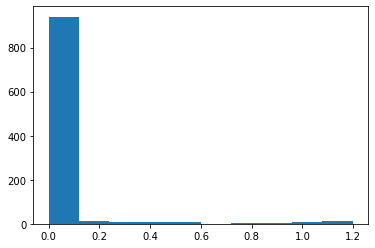

In [165]:
plt.hist(post)